<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Store2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install --upgrade --no-deps statsmodels

     |████████████████████████████████| 9.8 MB 18.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [19]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/kaggle_sales.csv')
df = df[(df['store'] == 1) & (df['item'] == 1)] # item 1 in store 1
df = df.set_index('date')

y = pd.DataFrame(df['sales'])
y.index.freq='D'
train = y[:-365]
test = y[-365:] # last year for testing


In [7]:
test

,sales
date,
1/1/2017,19
1/2/2017,15
1/3/2017,10
1/4/2017,16
1/5/2017,14
...,...
12/27/2017,14
12/28/2017,19
12/29/2017,15


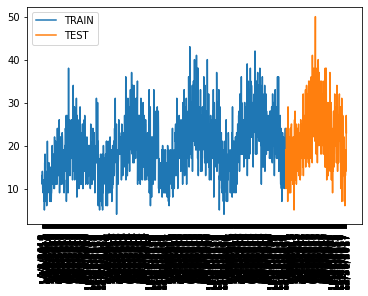

In [5]:
from matplotlib import pyplot as plt
plt.xticks( rotation='vertical')
plt.plot(train.index,train, label='TRAIN')
plt.plot(test.index,test, label='TEST')
plt.legend(loc="upper left")
plt.show()

In [ ]:
!pip install tbats

     |████████████████████████████████| 43 kB 920 kB/s 
     |████████████████████████████████| 1.4 MB 6.9 MB/s 
     |████████████████████████████████| 9.8 MB 46.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from tbats import TBATS, BATS# Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(train)# Forecast 365 days ahead
y_forecast = model.forecast(steps=365)

In [ ]:
y_forecast = model.forecast(steps=365)

test_predictions=pd.DataFrame(y_forecast)
test_predictions.columns=['sales']


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,y_forecast)}')
print(f'Mean Squared Error = {mean_squared_error(test,y_forecast)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(y_forecast) )}')

Mean Absolute Error = 3.8577289832270028
Mean Squared Error = 23.637445028684905
Mean Absolute Percentage Error = 35.497625473230976


Text(0.5, 1.0, 'Train, Test and Predicted Test using TBATS ')

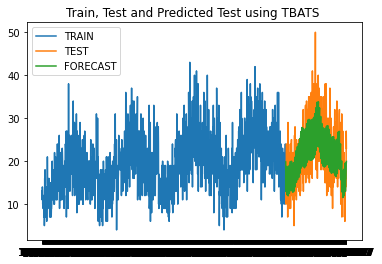

In [ ]:
from matplotlib import pyplot as plt
plt.plot(train,label='TRAIN')
plt.plot(test,label='TEST')
ni=test.index
test_predictions=test_predictions.set_index(ni)
plt.plot(test_predictions,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using TBATS ')

Holt Winters

In [8]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=365).fit()
test_predictions = fitted_model.forecast(365).rename('sales')


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [9]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

Mean Absolute Error = 5.859391287582682
Mean Squared Error = 56.80871732224168
Mean Absolute Percentage Error = 41.26774435015866


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

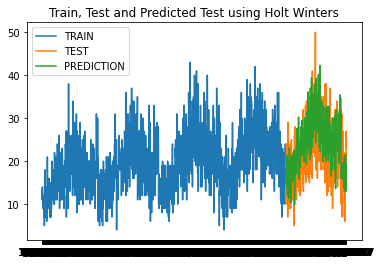

In [10]:
plt.plot(train,label='TRAIN')
plt.plot(test,label='TEST')
test_predictions=pd.DataFrame(test_predictions)
ni=test.index
test_predictions=test_predictions.set_index(ni)
plt.plot(test_predictions,label='PREDICTION')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using Holt Winters')

# ETS

Damped-False

In [11]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
test_predictions=ETSModel(train['sales'],error='add', trend='add',seasonal='add',damped_trend=False, seasonal_periods=365).fit().forecast(365)
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
mse=mean_squared_error(test,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
import numpy as np
def mape(actual,pred):
            return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Mean Absolute Error = 5.739792382732128
Mean Squared Error = 52.05230966552013
Root Mean Squared Error = 7.21472866194704
Mean Absolute Percentage Error = 40.65177417815756


Damped-True

In [12]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
test_predictions=ETSModel(train['sales'],error='add', trend='add',seasonal='add',damped_trend=True, seasonal_periods=365).fit().forecast(365)
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
mse=mean_squared_error(test,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
import numpy as np
def mape(actual,pred):
            return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Mean Absolute Error = 5.518961517788971
Mean Squared Error = 48.52526284540688
Root Mean Squared Error = 6.966007669060297
Mean Absolute Percentage Error = 36.591426512466505
